In [46]:
!pip install folium geopandas

In [47]:
import geopandas as gpd

g_aif = gpd.read_file("Data Hackathon_IA_2025/Data Hackathon_IA_2025/couche/aif.geojson")
g_dpl = gpd.read_file("Data Hackathon_IA_2025/Data Hackathon_IA_2025/couche/dpl.geojson")
g_dpm = gpd.read_file("Data Hackathon_IA_2025/Data Hackathon_IA_2025/couche/dpm.geojson")
g_enregistrement = gpd.read_file("Data Hackathon_IA_2025/Data Hackathon_IA_2025/couche/enregistrement individuel.geojson")
g_litige = gpd.read_file("Data Hackathon_IA_2025/Data Hackathon_IA_2025/couche/litige.geojson")



In [48]:
import folium
import random

# Centrer sur le Bénin
benin_center = [9.3077, 2.3158]
m = folium.Map(location=benin_center, zoom_start=7)

couches = [
    (g_aif, "Couche aif"),
    (g_dpl, "Couche dpl"),
    (g_dpm, "Couche dpm"),
    #(g_enregistrement, "Couche enregistrement"),
    (g_litige, "Couche litige")
]

def random_color():
    return "#{:06x}".format(random.randint(0, 0xFFFFFF))

infos_couches = ['commune', 'arrondissement', 'quartier', 'num_tf', 'id', 'TF_alea']

for gdf, name in couches:
    color = random_color()
    folium.GeoJson(
        gdf,
        name=name,
        style_function=lambda feature, col=color: {
            'fillColor': col,
            'color': col,
            'weight': 2,
            'fillOpacity': 0.4,
        },
        zoom_on_click=True,
        #tooltip=folium.GeoJsonTooltip(fields=infos_couches)
                                    
    ).add_to(m)


folium.LayerControl().add_to(m)
m.save("geo_map.html")


In [49]:
import geopandas as gpd
from shapely.geometry import Polygon

coords_proj = [(412226.02, 726363.65), (412245.72, 726330.51), (412225.75, 726316.86), (412213.68, 726308.44), (412203.81, 726316.12), (412192.31, 726324.67), (412178.87, 726334.35), (412203.36, 726353.49)]

poly = Polygon(coords_proj)

# GeoDataFrame avec CRS projeté
gdf = gpd.GeoDataFrame(index=[0], geometry=[poly], crs="EPSG:32631")

# Reprojection vers lat/lon
gdf = gdf.to_crs(epsg=4326)


coords_latlon = [[y, x] for x, y in gdf.geometry.iloc[0].exterior.coords]

print(coords_latlon[:5])


[[6.570721652997479, 2.206041502096716], [6.570422175940202, 2.2062201618025927], [6.570298421877642, 2.2060397310713746], [6.570222087743956, 2.20593068002639], [6.570291413671595, 2.2058412968019536]]


In [50]:
centroid = gdf.geometry.iloc[0].centroid

centroid_coords = [centroid.y, centroid.x]

# Marqueur
folium.Marker(
    location=centroid_coords,
    popup="Parcelle d'étude",
    icon=folium.Icon(color="red")
).add_to(m)

folium.Polygon(
        locations=coords_latlon,
        color="red",
        weight=2,
        fill=True,
        fill_color="red",
        fill_opacity=0.3
    ).add_to(m)

m.fit_bounds(coords_latlon)

m.save("geo_map.html")

In [51]:
#m.show_in_browser()

# Comparaison avec les couches

In [96]:
from geopandas import GeoDataFrame

couche_aif = GeoDataFrame.from_file("Data Hackathon_IA_2025/Data Hackathon_IA_2025/couche/aif.geojson")
#couche_aif = couche_aif.set_crs(epsg=32631)  
couche_aif.set_index('id', inplace=True)
couche_aif

,departement,commune,arrondissement,quartier,num_tf,TF_alea,geometry
id,,,,,,,
0,MONO,Grand-Popo,Grand-Popo,None,87,59,"MULTIPOLYGON Z (((368066.73 694574.85 0, 36840..."
1,BORGOU,NIKKI,NIKKI,GAH MARO,9,45,"MULTIPOLYGON Z (((522252.74 1098383.35 0, 5222..."
2,BORGOU,PARAKOU,2eme arrondissement,LADJIFARANI,837,44,"MULTIPOLYGON Z (((460290.44 1035323 0, 460286...."
3,\nAtlantique,ABOMEY-CALAVI,ABOMEY-CALAVI,None,9720,53,"MULTIPOLYGON Z (((426810.775 715417.543 0, 426..."
4,OUEME,PORTO-NOVO,None,None,2559,13,"MULTIPOLYGON Z (((456674.13 721614.58 0, 45672..."
5,MONO,LOKOSSA,AGNIVEDJI,None,35,80,"MULTIPOLYGON Z (((358798.82 736675.96 0, 35881..."
6,ATLANTIQUE,ABOMEY-CALAVI,GODOMEY,None,9719,27,"MULTIPOLYGON Z (((427411.972 706968.249 0, 427..."
7,LITTORAL,COTONOU,3ème ARRONDISSEMENT,AYELAWADJE,6816,47,"MULTIPOLYGON Z (((438842.977 705070.371 0, 438..."
8,COLLINES,DASSA-ZOUME,DASSA I,AGBEGBE,89,49,"MULTIPOLYGON Z (((409338.9 860896.58 0, 408490..."


In [97]:
gdf = gpd.GeoDataFrame(index=[0], geometry=[poly], crs="EPSG:32631")
gdf

,geometry
0,"POLYGON ((412226.02 726363.65, 412245.72 72633..."


In [89]:
u = couche_aif['geometry'].union_all()
inter = u.intersection(gdf.loc[0, 'geometry'])
print(inter)

POLYGON Z EMPTY


<Axes: >

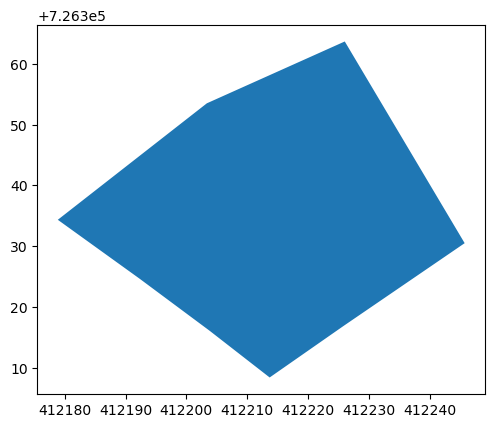

In [94]:
has_intersection = gdf.intersects(g_aif.union_all()).any()

intersections = gpd.overlay(gdf, g_aif, how='intersection')
intersections

In [102]:
print(gdf.crs)      # CRS du polygone
print(g_aif.crs)    # CRS de la couche


AttributeError: 'CRS' object has no attribute 'dtype'

In [98]:
#couche_aif['geometry'].intersection(gdf['geometry'])
#couche_aif.plot()
for i, row in couche_aif.iterrows():
    inter = row['geometry'].intersection(gdf.loc[0, 'geometry'])
    if not inter.is_empty:
        print(f"Intersection with id {i}: {inter}")
    else:
        print(f"No intersection with id {i}")

No intersection with id 0
No intersection with id 1
No intersection with id 2
No intersection with id 3
No intersection with id 4
No intersection with id 5
No intersection with id 6
No intersection with id 7
No intersection with id 8
No intersection with id 9
No intersection with id 10
No intersection with id 11
No intersection with id 12
No intersection with id 13
No intersection with id 14
No intersection with id 15
No intersection with id 16
No intersection with id 17
No intersection with id 18
No intersection with id 19
No intersection with id 20
No intersection with id 21
No intersection with id 22
No intersection with id 23
No intersection with id 24


In [100]:
#couche_aif['geometry'].difference(gdf['geometry'])
for row in couche_aif.itertuples():
    diff = gdf.loc[0, 'geometry'].difference(row.geometry)
    if not diff.is_empty:
        print(f"Difference with id {row.Index}: {diff}")
    else:
        print(f"No difference with id {row.Index}")

Difference with id 0: POLYGON Z ((412245.72 726330.51 0, 412225.75 726316.86 0, 412213.68 726308.44 0, 412203.81 726316.12 0, 412192.31 726324.67 0, 412178.87 726334.35 0, 412203.36 726353.49 0, 412226.02 726363.65 0, 412245.72 726330.51 0))
Difference with id 1: POLYGON Z ((412245.72 726330.51 0, 412225.75 726316.86 0, 412213.68 726308.44 0, 412203.81 726316.12 0, 412192.31 726324.67 0, 412178.87 726334.35 0, 412203.36 726353.49 0, 412226.02 726363.65 0, 412245.72 726330.51 0))
Difference with id 2: POLYGON Z ((412245.72 726330.51 0, 412225.75 726316.86 0, 412213.68 726308.44 0, 412203.81 726316.12 0, 412192.31 726324.67 0, 412178.87 726334.35 0, 412203.36 726353.49 0, 412226.02 726363.65 0, 412245.72 726330.51 0))
Difference with id 3: POLYGON Z ((412245.72 726330.51 0, 412225.75 726316.86 0, 412213.68 726308.44 0, 412203.81 726316.12 0, 412192.31 726324.67 0, 412178.87 726334.35 0, 412203.36 726353.49 0, 412226.02 726363.65 0, 412245.72 726330.51 0))
Difference with id 4: POLYGON Z 

## Plusieurs couches

In [82]:
from geopandas import GeoDataFrame

couche_aif = GeoDataFrame.from_file("Data Hackathon_IA_2025/Data Hackathon_IA_2025/couche/aif.geojson")
#couche_aif.set_index('id', inplace=True)
couche_dpl = GeoDataFrame.from_file("Data Hackathon_IA_2025/Data Hackathon_IA_2025/couche/dpl.geojson")
#couche_dpl.set_index('id', inplace=True)
couche_dpm = GeoDataFrame.from_file("Data Hackathon_IA_2025/Data Hackathon_IA_2025/couche/dpm.geojson")
#couche_dpm.set_index('id', inplace=True)

gdf = gpd.GeoDataFrame(index=[0], geometry=[poly], crs="EPSG:32631")

intersections = {}
for geodf, name in [(couche_aif, "aif"), (couche_dpl, "dpl"), (couche_dpm, "dpm")]:
    print(f"--- Intersections with {name} ---")
    for i, row in geodf.iterrows():
        inter = row['geometry'].intersection(gdf.loc[0, 'geometry'])
        if not inter.is_empty:
            print(f"Intersection with id {i}: {inter}")
            intersections.setdefault(name, []).append((i, inter))
        else:
            print(f"No intersection with id {i}")

print(intersections)

--- Intersections with aif ---
No intersection with id 0
No intersection with id 1
No intersection with id 2
No intersection with id 3
No intersection with id 4
No intersection with id 5
No intersection with id 6
No intersection with id 7
No intersection with id 8
No intersection with id 9
No intersection with id 10
No intersection with id 11
No intersection with id 12
No intersection with id 13
No intersection with id 14
No intersection with id 15
No intersection with id 16
No intersection with id 17
No intersection with id 18
No intersection with id 19
No intersection with id 20
No intersection with id 21
No intersection with id 22
No intersection with id 23
No intersection with id 24
--- Intersections with dpl ---
No intersection with id 0
No intersection with id 1
No intersection with id 2
No intersection with id 3
No intersection with id 4
No intersection with id 5
No intersection with id 6
No intersection with id 7
No intersection with id 8
No intersection with id 9
No intersecti

In [83]:
from geopandas import GeoDataFrame

couche_aif = GeoDataFrame.from_file("Data Hackathon_IA_2025/Data Hackathon_IA_2025/couche/aif.geojson")
#couche_aif.set_index('id', inplace=True)
couche_dpl = GeoDataFrame.from_file("Data Hackathon_IA_2025/Data Hackathon_IA_2025/couche/dpl.geojson")
#couche_dpl.set_index('id', inplace=True)
couche_dpm = GeoDataFrame.from_file("Data Hackathon_IA_2025/Data Hackathon_IA_2025/couche/dpm.geojson")
#couche_dpm.set_index('id', inplace=True)

gdf = gpd.GeoDataFrame(index=[0], geometry=[poly], crs="EPSG:32631")

differences = {}
for geodf, name in [(couche_aif, "aif"), (couche_dpl, "dpl"), (couche_dpm, "dpm")]:
    print(f"--- Differences with {name} ---")
    for i, row in geodf.iterrows():
        diff = row['geometry'].difference(gdf.loc[0, 'geometry'])
        if not diff.is_empty:
            print(f"Différence with id {i}: {diff}")
            differences.setdefault(name, []).append((i, diff))
        else:
            print(f"No difference with id {i}")

print(differences)

--- Differences with aif ---
Différence with id 0: POLYGON Z ((368405.03 694326.98 0, 368625.5 694174.31 0, 368846.7 694033.31 0, 368816.93 693966.75 0, 368690.27 693942.39 0, 368449.43 693888.24 0, 368210.66 693833.05 0, 367960.98 693777.88 0, 367473.58 693667.14 0, 367241.29 693597.7 0, 367180.57 693755.82 0, 367223.55 693811.25 0, 367338.32 694081.6 0, 367404.25 694138.9 0, 367642.53 694220.34 0, 367902.41 694354.97 0, 368066.73 694574.85 0, 368405.03 694326.98 0))
Différence with id 1: POLYGON Z ((522264.4 1098187.36 0, 522262.48 1098033.5 0, 522272.94 1097812.27 0, 522282.39 1097612.38 0, 522292.33 1097408.73 0, 522295.74 1097328.52 0, 522135.11 1097251.24 0, 522044.05 1097207.42 0, 521830.93 1097057.9 0, 521655.79 1096935.72 0, 521290.89 1096932.02 0, 521276.67 1097466.43 0, 520796.49 1097453.59 0, 520785.99 1097790.2 0, 520777.49 1098062.87 0, 520769.15 1098330.38 0, 521018.73 1098337.84 0, 521018.84 1098341.67 0, 521276.92 1098349.83 0, 521587.24 1098360.05 0, 521984.46 1098373

In [120]:
import geopandas as gpd
from shapely.errors import TopologicalError

def comparer_parcelle_with_couches(gdf_parcelle, couches):
    results = {}
    reste_final = gdf_parcelle.copy()
    print(f"[INIT] Reste final = {reste_final.shape[0]} géométries")

    for geodf, name in couches:
        print(f"\n--- Traitement de la couche : {name} ---")


        if geodf.crs not in ["EPSG:32631", "EPSG:32630", "EPSG:32632"]:
            geodf = geodf.to_crs(epsg=32631)
        if gdf_parcelle.crs != geodf.crs:
            gdf_parcelle = gdf_parcelle.to_crs(geodf.crs)


        try:
            union_couche = geodf.geometry.union_all()
        except Exception as e:
            print(f"[ERREUR] union_all impossible pour {name} : {e}")
            results[name] = {
                'has_intersection': False,
                'intersections': gpd.GeoDataFrame(),
                'reste': gdf_parcelle.copy()
            }
            continue

        try:
            has_intersection = gdf_parcelle.intersects(union_couche).any()
        except Exception as e:
            print(f"[ERREUR] intersects impossible pour {name} : {e}")
            has_intersection = False


        try:
            intersections = gpd.overlay(gdf_parcelle, geodf, how='intersection')
        except Exception as e:
            print(f"[ERREUR] overlay intersection échoué pour {name} : {e}")
            intersections = gpd.GeoDataFrame()


        try:
            reste = gpd.overlay(gdf_parcelle, geodf, how='difference')
        except Exception as e:
            print(f"[ERREUR] overlay difference échoué pour {name} : {e}")
            reste = gdf_parcelle.copy()


        results[name] = {
            'has_intersection': has_intersection,
            'intersections': intersections,
            'reste': reste
        }


        try:
            if not intersections.empty:
                reste_final["geometry"] = reste_final.geometry.difference(intersections.union_all())
        except TopologicalError as e:
            print(f"[ERREUR topo] difference avec intersections pour {name} : {e}")
        except Exception as e:
            print(f"[ERREUR] update reste_final échoué pour {name} : {e}")

        print(f"[INFO] {name} : {intersections.shape[0]} intersections, reste_final = {reste_final.shape[0]}")

    return results, reste_final


In [116]:
# couches : geodf, nom
couche_aif = GeoDataFrame.from_file("Data Hackathon_IA_2025/Data Hackathon_IA_2025/couche/aif.geojson")
couche_dpl = GeoDataFrame.from_file("Data Hackathon_IA_2025/Data Hackathon_IA_2025/couche/dpl.geojson")
couche_dpm = GeoDataFrame.from_file("Data Hackathon_IA_2025/Data Hackathon_IA_2025/couche/dpm.geojson")

couches = [
    (couche_aif, "aif"),
    (couche_dpl, "dpl"),
    (couche_dpm, "dpm")
]

comparaisons, portion_parcelle_libre = comparer_parcelle_with_couches(gdf, couches)
comparaisons

{'aif': {'has_intersection': False,
  'intersections': Empty GeoDataFrame
  Columns: [departement, commune, arrondissement, quartier, num_tf, id, TF_alea, geometry]
  Index: [],
  'reste':                                             geometry
  0  POLYGON ((412226.02 726363.65, 412245.72 72633...},
 'dpl': {'has_intersection': False,
  'intersections': Empty GeoDataFrame
  Columns: [Layer, PaperSpace, SubClasses, Linetype, EntityHandle, Text, geometry]
  Index: [],
  'reste':                                             geometry
  0  POLYGON ((412226.02 726363.65, 412245.72 72633...},
 'dpm': {'has_intersection': False,
  'intersections': Empty GeoDataFrame
  Columns: [type, geometry]
  Index: [],
  'reste':                                             geometry
  0  POLYGON ((412226.02 726363.65, 412245.72 72633...}}

In [105]:
portion_parcelle_libre

0    None
dtype: geometry

In [117]:
from shapely.geometry import Polygon

def coordonnees_to_polygon(coords):
    points = [(point['x'], point['y']) for point in coords]
    return Polygon(points)

# Algo 

In [125]:
from geopandas import GeoDataFrame
import geopandas as gpd
import json

# Données (map)

couche_aif = GeoDataFrame.from_file("Data Hackathon_IA_2025/Data Hackathon_IA_2025/couche/aif.geojson")
couche_dpl = GeoDataFrame.from_file("Data Hackathon_IA_2025/Data Hackathon_IA_2025/couche/dpl.geojson")
couche_dpm = GeoDataFrame.from_file("Data Hackathon_IA_2025/Data Hackathon_IA_2025/couche/dpm.geojson")

couches = [
    (couche_aif, "aif"),
    (couche_dpl, "dpl"),
    (couche_dpm, "dpm")
]


def analyse_empietement(coords_extraites_parcelle, couches):
    
    poly = coordonnees_to_polygon(coords_extraites_parcelle)
    
    gdf = gpd.GeoDataFrame(index=[0], geometry=[poly], crs="EPSG:32631")

    resultats_comparaison, parcelle_libre_finale = comparer_parcelle_with_couches(gdf, couches)
    
    results = {}
    
    for couche in couches :
        name = couche[1]
        
        results[name] = {}
        
        results[name]['has_intersection'] = bool(resultats_comparaison[name]['has_intersection'])
        
        if resultats_comparaison[name]['intersections'].empty:
            results[name]['intersections_sur_couche'] = None
        else :
            results[name]['intersections_sur_couche'] = resultats_comparaison[name]['intersections'].union_all()
        
        if resultats_comparaison[name]['reste'].empty:
            results[name]['reste'] = None
        else :
            results[name]['reste_sur_couche'] = resultats_comparaison[name]['reste'].union_all()
        
    results['parcelle_libre_finale'] = parcelle_libre_finale
    
    intersections_list = [
        resultats_comparaison[couche]['intersections'].union_all() 
        for couche in resultats_comparaison
        if not resultats_comparaison[couche]['intersections'].empty
    ]
    if intersections_list:
        union_intersections = gpd.GeoSeries(intersections_list).union_all()
    else:
        union_intersections = None
    
    
    results['union_intersections'] = union_intersections
    
    results['empietement'] = any(has_intersection for has_intersection in (results[couche[1]]['has_intersection'] for couche in couches))
           
    return json.dumps(results, default=str, indent=4)

In [126]:
print(analyse_empietement([{"x": 401354.03, "y": 712401.54}, {"x": 401247.82, "y": 712353.35}, {"x": 401312.94, "y": 712350.74}, {"x": 401329.1, "y": 712399.58}], couches))

[INIT] Reste final = 1 géométries

--- Traitement de la couche : aif ---
[INFO] aif : 0 intersections, reste_final = 1

--- Traitement de la couche : dpl ---
[INFO] dpl : 0 intersections, reste_final = 1

--- Traitement de la couche : dpm ---
[INFO] dpm : 0 intersections, reste_final = 1
{
    "aif": {
        "has_intersection": false,
        "intersections_sur_couche": null,
        "reste_sur_couche": "MULTIPOLYGON (((401325.45929977455 712388.5767946157, 401312.94 712350.74, 401247.82 712353.35, 401325.45929977455 712388.5767946157)), ((401354.03 712401.54, 401325.45929977455 712388.5767946157, 401329.1 712399.58, 401354.03 712401.54)))"
    },
    "dpl": {
        "has_intersection": false,
        "intersections_sur_couche": null,
        "reste_sur_couche": "MULTIPOLYGON (((401325.45929977455 712388.5767946157, 401312.94 712350.74, 401247.82 712353.35, 401325.45929977455 712388.5767946157)), ((401354.03 712401.54, 401325.45929977455 712388.5767946157, 401329.1 712399.58, 401354